In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings

In [45]:
# Read the netflix movie data 
data = pd.read_csv('imdb_movies.csv')

print(data.shape)
data.head()

(10178, 12)


,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [47]:
data.describe()

,score,budget_x,revenue
count,10178.000000,1.017800e+04,1.017800e+04
mean,63.497052,6.488238e+07,2.531401e+08
std,13.537012,5.707565e+07,2.777880e+08
min,0.000000,1.000000e+00,0.000000e+00
25%,59.000000,1.500000e+07,2.858898e+07
50%,65.000000,5.000000e+07,1.529349e+08
75%,71.000000,1.050000e+08,4.178021e+08
max,100.000000,4.600000e+08,2.923706e+09


In [48]:
# Check for duplicate values
data.duplicated("orig_title").sum()

442

In [49]:
# Drop duplicate values
data.drop_duplicates(subset="orig_title", inplace = True)

In [50]:
data.isna().sum()

names          0
date_x         0
score          0
genre         81
overview       0
crew          53
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [51]:
data = data.dropna()
data.isna().sum()

names         0
date_x        0
score         0
genre         0
overview      0
crew          0
orig_title    0
status        0
orig_lang     0
budget_x      0
revenue       0
country       0
dtype: int64

In [52]:
data['date_x'] = pd.to_datetime(data['date_x'], errors='coerce')

data['Release_year'] = data['date_x'].dt.year
data['Release_Month'] = data['date_x'].dt.month

data.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,Release_year,Release_Month
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,2023,3
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,2022,12
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,2023,4
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,2023,1
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,2023,3


## EDA

#### Top 10 movies

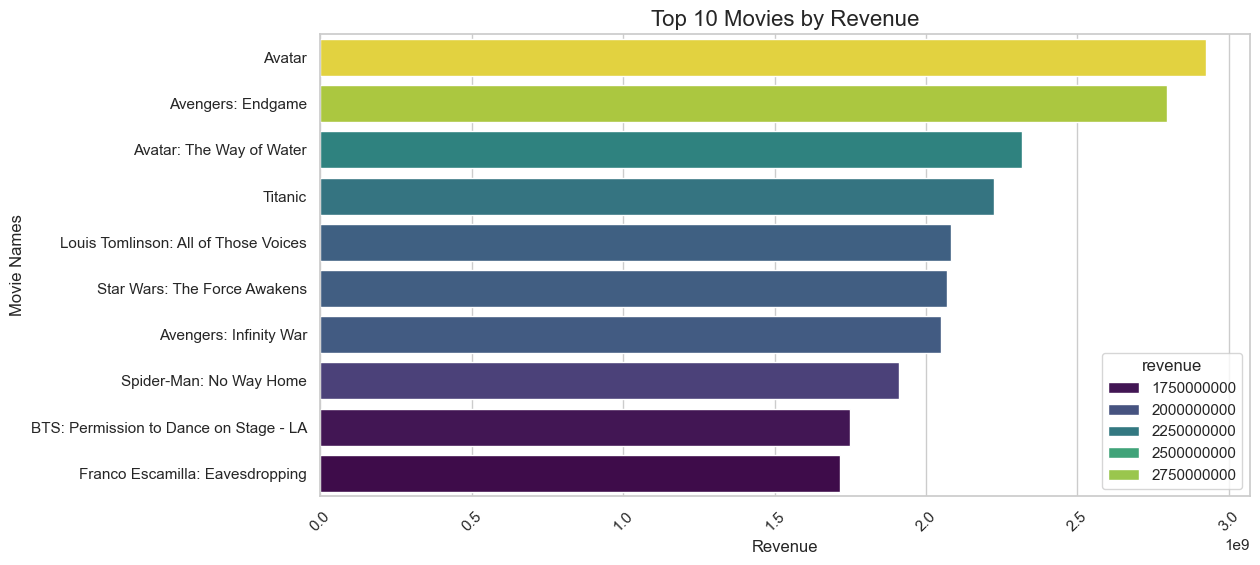

In [53]:
top_revenues = data.sort_values("revenue", ascending = False).head(10)

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='revenue', y='names', hue = 'revenue',data=top_revenues, palette="viridis")

ax.set_title('Top 10 Movies by Revenue', fontsize=16)
ax.set_xlabel('Revenue')
ax.set_ylabel('Movie Names')
plt.xticks(rotation=45)
plt.show()

####  Top 10 Most content by release years

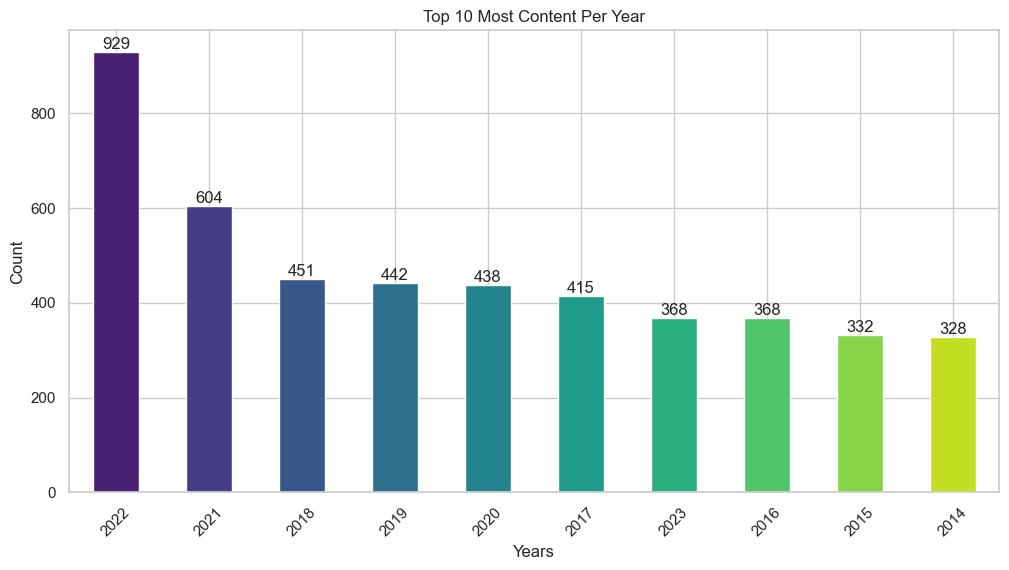

In [54]:
release_year = data["Release_year"].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
colors = sns.color_palette("viridis", len(release_year))
ax = release_year.plot(kind='bar', color=colors)

plt.title('Top 10 Most Content Per Year')
plt.xlabel('Years')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add value labels on top of each bar
for index, value in enumerate(release_year):
    ax.text(index, value, str(value), ha='center', va='bottom', fontsize=12)

plt.show()


#### Top 10 Countries with Most Movies

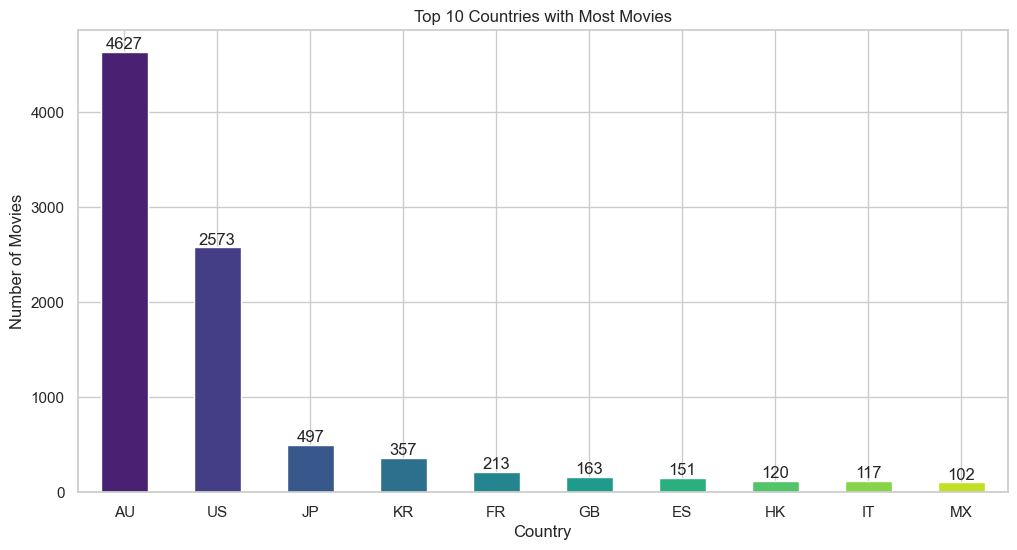

In [73]:
country_counts = data['country'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
colors = sns.color_palette("viridis", len(country_counts))
ax = country_counts.plot(kind='bar', color=colors)

plt.title('Top 10 Countries with Most Movies')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=0)

# Add value labels on top of each bar
for index, value in enumerate(country_counts):
    ax.text(index, value, str(value), ha='center', va='bottom', fontsize=12)

plt.show()


#### Correlation of numerical features

<Axes: >

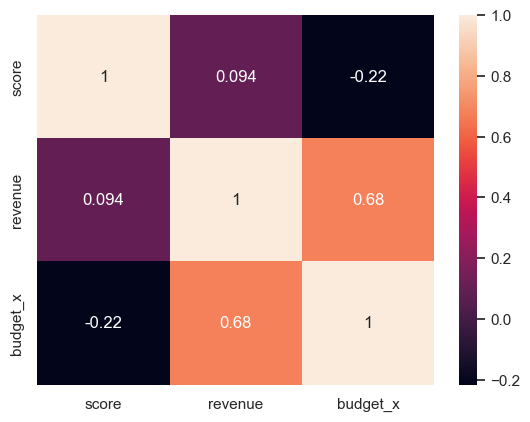

In [56]:
corr = data[["score", "revenue", "budget_x"]].corr()
sns.heatmap(corr, annot=True)

#### Find Movie similarity from plot overview

In [58]:
data_similarity = data.copy()

In [59]:
# Create an index column
data_similarity['index'] = range(0, len(data_similarity)) 

# Put the column at the beginning
data_similarity = data_similarity.set_index('index').reset_index() 

data_similarity.head()

,index,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,Release_year,Release_Month
0,0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,2023,3
1,1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,2022,12
2,2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,2023,4
3,3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,2023,1
4,4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,2023,3


In [60]:
recom_features = data_similarity['genre'] + ' ' + data_similarity['overview'] + ' ' + data_similarity['crew'] + ' ' + data_similarity['orig_lang']
recom_features

0       Drama, Action After dominating the boxing worl...
1       Science Fiction, Adventure, Action Set more th...
2       Animation, Adventure, Family, Fantasy, Comedy ...
3       Animation, Comedy, Family, Adventure, Fantasy ...
4       Action Good-hearted teenager William always li...
                              ...                        
9609    Drama In 1979 Santa Barbara, California, Dorot...
9610    Action When DEA agents are taken captive by a ...
9611    Drama, Thriller, Romance Barley Scott Blair, a...
9612    Action, Adventure, Science Fiction, Thriller, ...
9613    Animation, Family, Fantasy Princess Odette and...
Length: 9614, dtype: object

In [61]:
vectorizer = TfidfVectorizer()

tfidf_vector = vectorizer.fit_transform(recom_features)

similarity_distance = cosine_similarity(tfidf_vector)

In [76]:
def get_recommendations(movie_title, cosine_sim, df, top_n=10):
    # Get the index of the movie that matches the title
    idx = df[df['orig_title'] == movie_title]['index'].values[0]

    # Get the similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the top-n most similar movies (excluding itself)
    sim_scores = sim_scores[1:top_n+1]

    # Get the movie indices and similarity scores
    movie_indices = [i[0] for i in sim_scores]
    similarity_scores = [i[1] for i in sim_scores]
    similar_movies = df['orig_title'].iloc[movie_indices].values

    recommendations_df = pd.DataFrame({'Movie Title': similar_movies, 'Similarity Score': similarity_scores})
    
    return recommendations_df

def plot_recommendations(recommendations_df, movie_title):
    # warnings.filterwarnings('ignore', category=UserWarning)
    plt.figure(figsize=(10, 6))
    colors = sns.color_palette("viridis", len(release_year))
    plt.barh(recommendations_df['Movie Title'], recommendations_df['Similarity Score'], color=colors)
    plt.xlabel('Similarity Score')
    plt.title(f'Recommendations for "{movie_title}"')
    plt.gca().invert_yaxis() 
    plt.show()


Recommendations for 'Spider-Man':
                           Movie Title  Similarity Score
0                         Spider-Man 2          0.480408
1                         Spider-Man 3          0.475943
2             The Amazing Spider-Man 2          0.321826
3    Spider-Man: Into the Spider-Verse          0.298289
4              Spider-Man: No Way Home          0.296326
5               The Amazing Spider-Man          0.292669
6  Spider-Man: Across the Spider-Verse          0.274269
7               Spider-Man: Homecoming          0.263365
8            Spider-Man: Far From Home          0.211376
9          A Christmas Story Christmas          0.210748


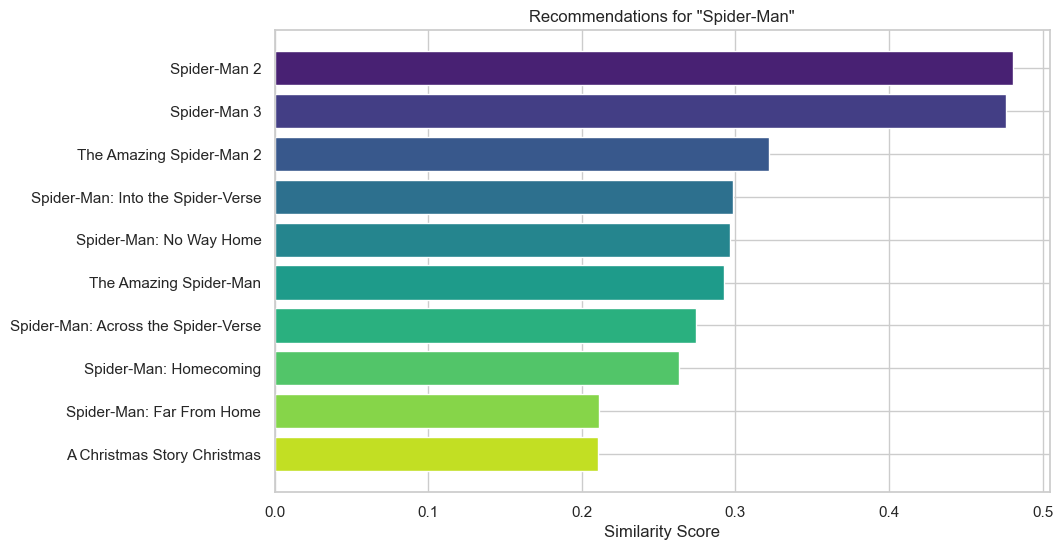

In [77]:
# Example usage
movie_title = 'Spider-Man'

recommendations = get_recommendations(movie_title, similarity_distance, data_similarity)

print(f"Recommendations for '{movie_title}':")
print(recommendations)

plot_recommendations(recommendations, movie_title)